In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.stats import poisson
from scipy.stats import norm

%matplotlib inline


In [80]:
from math import log10
def eng_str(x, u=0, n=1):
    """Print formatted value and its uncertainty in engineering format"""
    y = abs(x)
    exponent = int(log10(y))
    engr_exponent = exponent - exponent%3
    z = y/10**engr_exponent
    sign = '-' if x < 0 else ''
    fmt = "{z:.%df}" % (n)
    xStr = sign+fmt.format(z=z)
    
    # uncertainty
    yU = abs(u)
    zU = yU/10**engr_exponent
    fmtU = "{zU:.%df}" % (n)
    if engr_exponent != 0:
        uStr = " ± "+fmtU.format(zU=zU)+'e'+str(engr_exponent)
    else:
        uStr = " ± "+fmtU.format(zU=zU)
    return xStr + uStr

print(eng_str(123456, 3456, n=1))

123.5 ± 3.5e3


In [163]:
# Name of test to plot
name = "mm"

files = glob("Data/*.csv")
files.sort()
for (i, f) in enumerate(files):
    print(f"{i:3d}: {f}")
iFile = int(input("Enter file number: "))
dataFile = files[iFile]
print(f"Using {dataFile}")

if name not in dataFile:
    raise WrongTestFile(f"Wrong test file for {name}")

# Get distance in mm
D = float(dataFile[dataFile.rfind("-")+1:dataFile.find(name)].replace('_', '.'))

# Check if data file from this test
with open(dataFile, 'r') as fp:
    line = fp.readline()

data = np.genfromtxt(dataFile, delimiter=',', comments='#')
time = data[:,0] - data[0,0]
counts = data[:,1]
avgCounts = data[:,2]
avgCPS = counts.mean()
nPoints = len(time)
print(f"There are {nPoints} points")
print(f"The average is {avgCPS:.3f}")
figName = "Figures/" + dataFile[dataFile.find('2'):dataFile.find('.')] + r"_%.03d.png"
iPlot = 0

  0: Data/2022-06-07-2031-2_0mm.csv
  1: Data/2022-06-07-2038-10_0mm.csv
  2: Data/2022-06-07-2045-18_0mm.csv
  3: Data/2022-06-07-2049-5_2mm.csv
  4: Data/2022-06-07-2052-13_2mm.csv
  5: Data/2022-06-07-2057-8_4mm.csv
  6: Data/2022-06-07-2102-16_4mm.csv
  7: Data/2022-06-07-2108-11_6mm.csv
  8: Data/2022-06-07-2111-19_6mm.csv
  9: Data/2022-06-07-2114-7_4mm.csv
 10: Data/2022-06-07-2118-15_4mm.csv
 11: Data/2022-06-07-2123-10_6mm.csv
 12: Data/2022-06-07-2126-18_6mm.csv
 13: Data/2022-06-08-1212-5_2mm.csv
 14: Data/CPS_vs_D.csv
Enter file number: 8
Using Data/2022-06-07-2111-19_6mm.csv
There are 103 points
The average is 10.466


In [164]:
D = float(dataFile[dataFile.rfind("-")+1:dataFile.find(name)].replace('_', '.'))
print(D)

19.6

# Setting Range of Good Data
Sometimes there are bad points at the start or end of the data file, usually 
caused by light leaking in while adjusting something. First plot all of the 
data, then set the iG (i-good) array to restrict the plotting and analysis 
to the good data points.

In [165]:
iG = np.array(range(len(counts)))
# iG = np.array(range(91))
avgCPS = counts[iG].mean()
uncCPS = counts[iG].std()/np.sqrt(len(iG))
(avgCPS, uncCPS)

(10.466019417475728, 0.45347508419970534)

19.6, 10.466, 0.453


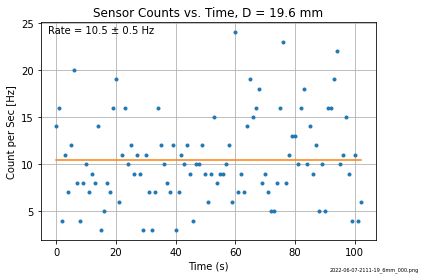

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time[iG], counts[iG], '.')
ax.plot((time[0],time[-1]), (avgCPS,avgCPS))
ax.plot()
ax.grid()
ax.set_title(f"Sensor Counts vs. Time, D = {D} mm")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Count per Sec [Hz]")
ax.text(.02,.95, f"Rate = {eng_str(avgCPS, uncCPS, n=1)} Hz", transform=ax.transAxes)

iPlot = 0
fn = figName%iPlot
ax.text(1, 0.02,fn[8:], transform=fig.transFigure, \
        ha='right', fontsize=5)
fig.savefig(fn, dpi=150)
iPlot += 1

print(f"{D:.1f}, {avgCPS:.3f}, {uncCPS:.3f}")

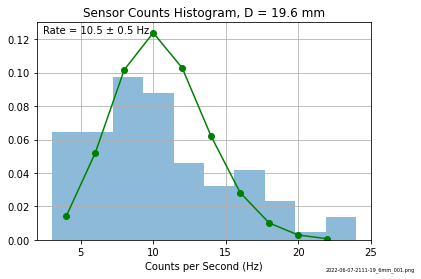

In [167]:
fig = plt.figure()
ax = fig.add_subplot(111)
# [yVals, xTmp, bars] = ax.hist(counts, bins=int(np.sqrt(nPoints)), \
#                               density=True, alpha=0.5)
# myBins = np.array(range(int(max(counts+1))))
[yVals, xTmp, bars] = ax.hist(counts[iG], \
                              density=True, alpha=0.5)
ax.grid()
ax.set_title(f"Sensor Counts Histogram, D = {D} mm")
ax.set_xlabel("Counts per Second (Hz)")
ax.text(.02,.95, f"Rate = {eng_str(avgCPS, uncCPS, n=1)} Hz", transform=ax.transAxes)

xVals = np.array(np.floor(0.5 * (xTmp[1:]+xTmp[:-1]))+0.5, dtype=int)
plt.plot(xVals,poisson.pmf(xVals, avgCPS), '-og')

iPlot = 1
fn = figName%iPlot
ax.text(1, 0.02,fn[8:], transform=fig.transFigure, \
        ha='right', fontsize=5)
fig.savefig(fn, dpi=150)
iPlot += 1
pass